In [1]:
from omega_prime_visibility import get_visibility_df
import omega_prime
import shapely

In [2]:
r = omega_prime.Recording.from_file("highway_merge.mcap", compute_polygons=True)

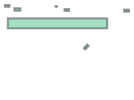

In [4]:
obstruction_poly = shapely.Polygon(
    [
        [-220, 10],
        [-120, 10],
        [-120, -0],
        [-220, -0],
    ]
)
shapely.GeometryCollection(list(r._df.filter(frame=0)["polygon"]) + [obstruction_poly])

In [5]:
df = get_visibility_df(r._df, ego_idx=0, static_occluder_polys=[obstruction_poly])
df

Compute Visibility:   0%|          | 0/433 [00:00<?, ?it/s]

frame,total_nanos,idx,occluder_idxs,static_occluder_idxs,visibility
i64,i64,i64,list[i64],list[i64],f64
0,0,1,[],[0],0.42
0,0,2,[],[0],0.0
0,0,3,[],[0],0.0
0,0,4,[],[0],0.0
0,0,5,[3],[0],0.0
…,…,…,…,…,…
432,14255999999,1,[2],[],0.0
432,14255999999,2,[],[],1.0
432,14255999999,3,[],[],1.0


In [11]:
import altair as alt
alt.data_transformers.enable("vegafusion")

alt.Chart(df).mark_line().encode(
    alt.X("frame"), alt.Y("visibility"), alt.Color("idx:N"), tooltip=["idx", "visibility", "frame"]
).properties(title="Visibility of Objects from idx=0")

alt.Chart(...)